In [ ]:
# Installing the dataset - Need kaggle.json file
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download chrisfilo/fruit-recognition
! unzip fruit-recognition.zip -d archive -p
! mkdir archive
! unzip fruit-recognition.zip -d archive

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import os
import cv2
    
# Fix seed
np.random.seed(1) # Add random seed of training for reproducibility

# Read images from folder
def load_images_from_folder(folder,only_path = False, label = ""):
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path

In [ ]:
# Get images from every folder
images = []
dirp = "/content/archive/"
for f in os.listdir(dirp):
    if "png" in os.listdir(dirp+f)[0]:
        images += load_images_from_folder(dirp+f,True,label = f)
    else: 
        for d in os.listdir(dirp+f):
            images += load_images_from_folder(dirp+f+"//"+d,True,label = f)
            
df = pd.DataFrame(images, columns = ["fruit", "path"])

from sklearn.utils import shuffle
# Shuffling the data and their indexes
df = shuffle(df, random_state = 0)
df = df.reset_index(drop=True)

# Each fruit type gets a unique number
fruit_names = sorted(df.fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

df

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


,fruit,path,label
0,Peach,/content/archive/Peach/Peach001768.png,7
1,Peach,/content/archive/Peach/Peach001279.png,7
2,Guava,/content/archive/Guava//Guava total/GuavaуАВ13...,3
3,Mango,/content/archive/Mango/Mango004153.png,5
4,Plum,/content/archive/Plum/PlumуАВ725.png,11
...,...,...,...
70544,Apple,/content/archive/Apple//Total Number of Apples...,0
70545,Guava,/content/archive/Guava//Guava total/GuavaуАВ23...,3
70546,Guava,/content/archive/Guava//Guava total/GuavaуАВ61...,3
70547,Guava,/content/archive/Guava//Guava total/GuavaуАВ13...,3


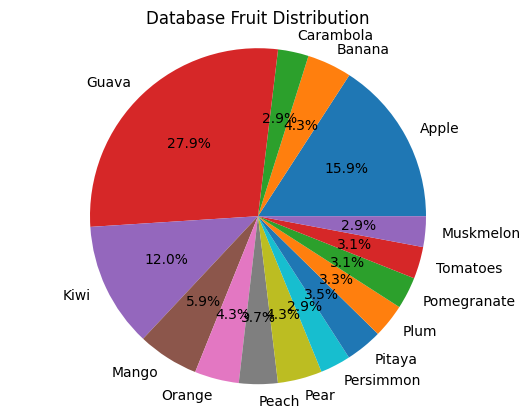

In [ ]:
# Database Pie Chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi','Mango','Orange','Peach','Pear','Persimmon','Pitaya','Plum','Pomegranate','Tomatoes','Muskmelon']
apple = df.loc[df['fruit'] == 'Apple'].count().iloc[0]
banana = df.loc[df['fruit'] == 'Banana'].count().iloc[0]
carambola = df.loc[df['fruit'] == 'Carambola'].count().iloc[0]
guava = df.loc[df['fruit'] == 'Guava'].count().iloc[0]
kiwi = df.loc[df['fruit'] == 'Kiwi'].count().iloc[0]
mango = df.loc[df['fruit'] == 'Mango'].count().iloc[0]
orange = df.loc[df['fruit'] == 'Orange'].count().iloc[0]
peach = df.loc[df['fruit'] == 'Peach'].count().iloc[0]
pear = df.loc[df['fruit'] == 'Pear'].count().iloc[0]
persimmon = df.loc[df['fruit'] == 'Persimmon'].count().iloc[0]
itaya = df.loc[df['fruit'] == 'Pitaya'].count().iloc[0]
plum = df.loc[df['fruit'] == 'Plum'].count().iloc[0]
pomegranate = df.loc[df['fruit'] == 'Pomegranate'].count().iloc[0]
tomatoes = df.loc[df['fruit'] == 'Tomatoes'].count().iloc[0]
muskmelon = df.loc[df['fruit'] == 'muskmelon'].count().iloc[0]

sizes = [apple, banana, carambola, guava, kiwi,mango,orange,peach,pear,persimmon,itaya,plum,pomegranate,tomatoes,muskmelon]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Database Fruit Distribution')


plt.show()

In [ ]:
# Number of occurences of eacg fruit
print("Occurrence of each fruit in the database")
print(df.groupby(['fruit']).size())

Occurrence of each fruit in the database
fruit
Apple          11185
Banana          3027
Carambola       2080
Guava          19698
Kiwi            8465
Mango           4154
Orange          3012
Peach           2629
Pear            3012
Persimmon       2072
Pitaya          2501
Plum            2298
Pomegranate     2167
Tomatoes        2171
muskmelon       2078
dtype: int64
